# Programming Exercise 6: Support Vector Machines

## Introduction
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
import sklearn.svm
import math
from collections import OrderedDict

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1 Support Vector Machines

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier. The provided script, ex6.m, will help you step through the first half of the exercise.

In [2]:
# =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

a = scipy.io.loadmat('ex6data1.mat')
X = a['X']
y = a['y']

In [3]:
def plotData(X, y):
    
    y = y.flatten()
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7, mew=2)
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7)

    
def visualizeBoundary(X, y, clf):
    
    # plot data on top of bounary
    plotData(X, y)
    
    # make classification predictions over a grid of values
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    vals = np.zeros(X1.shape)
    for ii in range(100):
        this_X = np.vstack((X1[:,ii], X2[:,ii])).T
        vals[:, ii] = clf.predict(this_X)
        
    plt.contour(X1, X2, vals, [0,0], corner_mask='legacy')

Loading and Visualizing Data ...



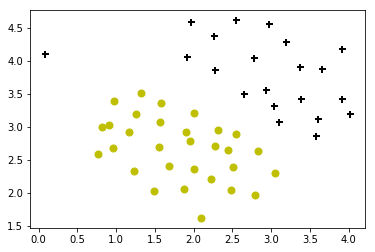

In [4]:
print('Loading and Visualizing Data ...\n')
plotData(X, y)

## 1.1 Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data (Figure 1). In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier a↵ects the SVM decision boundary.

In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The next part in script will run the SVM training (with C = 1) using SVM software that we have included with the starter code, svmTrain When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left (Figure 2).

Your task is to try different values of C on this dataset. Specifically, you should change the value of C in the script to C = 100 and run the SVM training again. When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data (Figure 3).

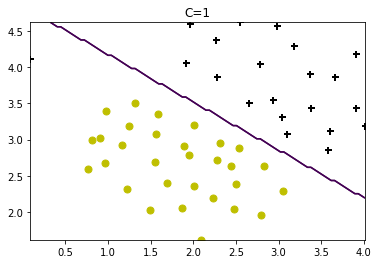

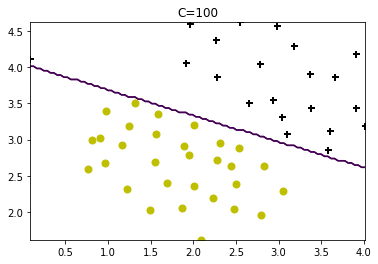

In [5]:
# ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.
#

# Load from ex6data1: 
# You will have X, y in your environment

a = scipy.io.loadmat('ex6data1.mat')
X = a['X']
y = a['y']

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

C = 1.0
clf = sklearn.svm.SVC(C=C, kernel='linear')
clf.fit(X, y.ravel()) 

visualizeBoundary(X, y, clf)
plt.title('C=1')

# C = 100
C = 100.0
clf = sklearn.svm.SVC(C=C, kernel='linear')
clf.fit(X, y.ravel()) 

plt.figure()
visualizeBoundary(X, y, clf)
plt.title('C=100')

## 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.


### 1.2.1 Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. 

You should now complete the code in gaussianKernel.m to compute the Gaussian kernel between two examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel function is defined as:

$$
K_{gaussian}(x^{(i)}, x{(j)}) = exp(-\frac{\|x^{(i)}-x^{(j)}\|^2}{2\sigma^2}) = exp(-\frac{\sum\limits^n_{k=1}(x^{(i)}_k-x^{(j)}_k)^2}{2\sigma^2}) $$

Once you’ve completed the function gaussianKernel.m, the script ex6.m will test your kernel function on two provided examples and you should expect to see a value of 0.324652.


In [6]:
def gaussianKernel(x1, x2, sigma):
    #RBFKERNEL returns a radial basis function kernel between x1 and x2
    #   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
    #   and returns the value in sim

    # Ensure that x1 and x2 are column vectors
    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x1.size, 1))

    # You need to return the following variables correctly.
    sim = 0

    sim = np.exp(-np.sum((x1-x2)**2)/2/sigma/sigma)

    return sim

In [7]:
# =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print('\nEvaluating the Gaussian Kernel ...\n')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))


Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)



#### 1.2.2 Example Dataset 2

The next part will load and plot dataset 2 (Figure 4). From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If you have correctly implemented the Gaussian kernel function, ex6.m will proceed to train the SVM with the Gaussian kernel on this dataset.

Figure 5 shows the decision boundary found by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

In [8]:
# =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...\n')

# Load from ex6data2: 
# You will have X, y in your environment
a = scipy.io.loadmat('ex6data2.mat')
X = a['X']
y = a['y']

Loading and Visualizing Data ...



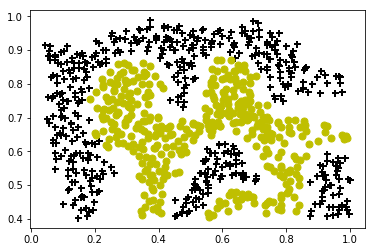

In [9]:
# Plot training data
plotData(X, y)


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...



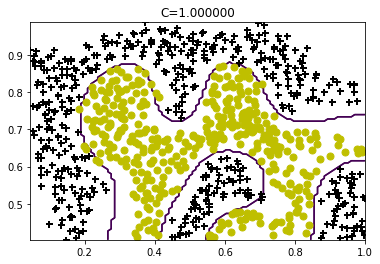

In [10]:
# ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the 
#  SVM classifier.
# 
print('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

# Load from ex6data2: 
# You will have X, y in your environment
a = scipy.io.loadmat('ex6data2.mat')
X = a['X']
y = a['y']

# SVM Parameters
C = 1
sigma = 0.1
gamma = 1 / 2 / sigma**2

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y.ravel()) 

visualizeBoundary(X, y, clf)
plt.title('C=%f'%C)

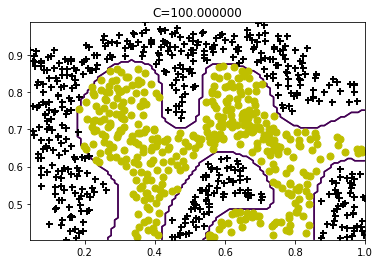

In [11]:
# SVM Parameters
C = 100
sigma = 0.1
gamma = 1 / 2 / sigma**2

# train SVM with gaussian kernel
clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y.ravel()) 

visualizeBoundary(X, y, clf)
plt.title('C=%f'%C)

#### 1.2.3 Example Dataset 3
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next part of the script will load and display a third dataset (Figure 6). You will be using the SVM with the Gaussian kernel with this dataset.

In the provided dataset, ex6data3, you are given the variables X, y, Xval, yval. The provided code in ex6.m trains the SVM classifier using the training set (X, y) using parameters loaded from dataset3Params.m. 

Your task is to use the cross validation set Xval, yval to determine the best C and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for C and $\sigma$ (e.g., C = 0.3 and $\sigma$ = 0.1). For example, if you try each of the 8 values listed above for C and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. 

After you have determined the best C and $\sigma$ parameters to use, you should modify the code in dataset3Params, filling in the best parameters you found. For our best parameters, the SVM returned a decision boundary shown in Figure 7.



In [12]:
# =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...\n')

# Load from ex6data3: 
# You will have X, y in your environment
a = scipy.io.loadmat('ex6data3.mat')
X = a['X']
y = a['y']
Xval = a['Xval']
yval = a['yval']

Loading and Visualizing Data ...



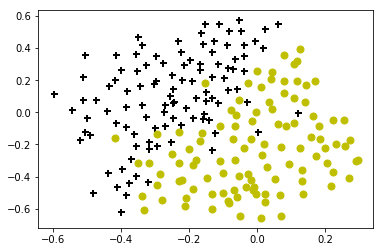

In [13]:
# Plot training data
plotData(X, y)

In [14]:
def dataset3Params(X, y, Xval, yval):
#DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
#where you select the optimal (C, sigma) learning parameters to use for SVM
#with RBF kernel
#   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
#   sigma. You should complete this function to return the optimal C and 
#   sigma based on a cross-validation set.
#

# You need to return the following variables correctly.
# C = 1;
# sigma = 0.1;

    C_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);
    sigma_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);

    best_error = math.inf

    for cur_C in C_vec:
        for cur_sigma in sigma_vec:
            gamma = 1 / 2 / cur_sigma**2
            clf = sklearn.svm.SVC(C=cur_C, kernel='rbf', gamma=gamma)
            clf.fit(X, y.ravel()) 

            prediction = clf.predict(Xval)
            
            error = np.mean(prediction!=yval.flatten());
            
            if(error < best_error):
                best_error = error
                C = cur_C
                sigma = cur_sigma

    print('Best parameter found C=%f sigma=%f: error=%f' % (C, sigma, best_error))
    
    return (C, sigma)

Best parameter found C=1.000000 sigma=0.100000: error=0.035000


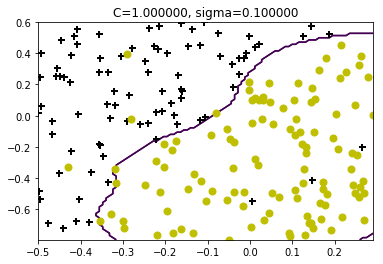

In [15]:
# ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.
# 

# Load from ex6data3: 
# You will have X, y in your environment
a = scipy.io.loadmat('ex6data3.mat')
X = a['X']
y = a['y']
Xval = a['Xval']
yval = a['yval']

# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval);
gamma = 1 / 2 / sigma**2

# train SVM with gaussian kernel
clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y.ravel()) 

p = clf.predict(Xval)

visualizeBoundary(Xval, yval, clf)
plt.title('C=%f, sigma=%f'% (C, sigma))

# 2 Spam Classification

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter. You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector $x \in \Bbb{R}^n$. The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

Throughout the rest of this exercise, you will be using the the below script. The dataset included for this exercise is based on a a subset of the SpamAssassin Public Corpus. For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

In [30]:
import re
import nltk
import sys

### 2.1 Preprocessing Emails
Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Figure 8 shows a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be di↵erent in almost every email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string “httpaddr” to indicate that a URL was present. 


This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small. In processEmail.m, we have implemented the following email preprocessing and normalization steps:


* Lower-casing: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
* Stripping HTML: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
* Normalizing URLs: All URLs are replaced with the text "httpaddr".
* Normalizing Email Addresses: All email addresses are replaced with the text "emailaddr".
* Normalizing Numbers: All numbers are replaced with the text "number".
* Normalizing Dollars: All dollar signs (`$`) are replaced with the text "dollar".
* Word Stemming: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
* Removal of non-words: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

The result of these preprocessing steps is shown in Figure 9. While preprocessing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

In [17]:
def readFile(filename):
#READFILE reads a file and returns its entire contents 
#   file_contents = READFILE(filename) reads a file and returns its entire
#   contents in file_contents
#
    # Load File   
    with open(filename, 'r') as fid:
        file_contents = fid.read()
    
    return file_contents

In [18]:
def getVocabList():
#GETVOCABLIST reads the fixed vocabulary list in vocab.txt and returns a
#cell array of the words
#   vocabList = GETVOCABLIST() reads the fixed vocabulary list in vocab.txt 
#   and returns a cell array of the words in vocabList.

    # read vocab file
    vfile = np.genfromtxt('vocab.txt', dtype='S42')
    
    # For ease of implementation, we use a struct to map the strings => integers
    # In practice, you'll want to use some form of hashmap
    x = OrderedDict()
    for ct, word in vfile:
        x[word.decode()] = int(ct)
    
    return x

In [19]:
def processEmail(email_contents):
    #PROCESSEMAIL preprocesses a the body of an email and
    #returns a list of word_indices 
    #   word_indices = PROCESSEMAIL(email_contents) preprocesses 
    #   the body of an email and returns a list of indices of the 
    #   words contained in the email. 
    #

    # Load Vocabulary
    vocabList = getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # hdrstart = strfind(email_contents, ([char(10) char(10)]));
    # email_contents = email_contents(hdrstart(1):end);

    # Lower case
    email_contents = email_contents.lower()

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents)


    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    print('\n==== Processed Email ====\n\n')

    # Process file
    l = 0

    # Tokenize and also get rid of any punctuation
    tokens = re.split( '[ ' + 
                      re.escape("@$/#.-:&*+=[]?!(){},'\">_<;%") + '\r\n]', 
                      email_contents )
    
    stemmer = nltk.stem.PorterStemmer()
    
    for token in tokens:
        token = re.sub('[^a-zA-Z0-9]','', token)
        token = stemmer.stem(token.strip())
        
        #if(l < 78):
        #    print(token, len(token))
            
        if len(token) < 1:
            continue
        
        if str(token) in vocabList:
            word_indices.append(vocabList[str(token)])
            
        # Print to screen, ensuring that the output lines are not too long
        if (l + len(token) + 1) > 78:
            sys.stdout.write('\n')
            l = 0
            
        sys.stdout.write('%s ' % token)
        l = l + len(token) + 1

    # Print footer
    print('\n\n=========================\n');
    
    return word_indices

In [20]:
# ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

print('\nPreprocessing sample email (emailSample1.txt)\n')

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices  = processEmail(file_contents)

# Print Stats
print('Word Indices: \n')
print(word_indices)
print('\n\n')


Preprocessing sample email (emailSample1.txt)


==== Processed Email ====


anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 


Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]





### 2.1.1 Vocabulary List
After preprocessing the emails, we have a list of words (e.g., Figure 9) for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out. 

For this exercise, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the model to overfit our training set. The complete vocabulary list is in the file vocab.txt and also shown in Figure 10. Our vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus, resulting in a list of 1899 words. In practice, a vocabulary list with about 10,000 to 50,000 words is often used.


Given the vocabulary list, we can now map each word in the preprocessed emails (e.g., Figure 9) into a list of word indices that contains the index of the word in the vocabulary list. Figure 11 shows the mapping for the sample email. Specifically, in the sample email, the word “anyone” was first normalized to “anyon” and then mapped onto the index 86 in the vocabulary list.

Your task now is to complete the code in processEmail.m to perform this mapping. In the code, you are given a string str which is a single word from the processed email. You should look up the word in the vocabulary list vocabList and find if the word exists in the vocabulary list. If the word exists, you should add the index of the word into the word indices variable. If the word does not exist, and is therefore not in the vocabulary, you can skip the word.

Once you have implemented processEmail, the script ex6 spam.m will run your code on the email sample and you should see an output similar to Figures 9 & 11.

### 2.2 Extracting Features from Emails

You will now implement the feature extraction that converts each email into a vector in Rn. For this exercise, youwill be using n = # words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the i-th word in the dictionary occurs in the email. That is, $x_i = 1$ if the i-th word is in the email and $x_i = 0$ if the i-th word is not present in the email. 

Thus, for a typical email, this feature would look like:
$$ x = \begin{bmatrix}
    0 \\
    \vdots \\
    1 \\
    0 \\
    \vdots \\
    1 \\
    0 \\
    \vdots \\
    0 \\
    \end{bmatrix} \in \Bbb{R}^n$$

You should now complete the code in emailFeatures.m to generate a feature vector for an email, given the word indices.

Once you have implemented emailFeatures, the next part of script will run your code on the email sample. You should see that the feature vector had length 1899 and 45 non-zero entries.

In [21]:
def emailFeatures(word_indices):
#EMAILFEATURES takes in a word_indices vector and produces a feature vector
#from the word indices
#   x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
#   produces a feature vector from the word indices. 

    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros(n)

    for i in word_indices:
        x[i-1] = 1
    
    return x

In [22]:
# ==================== Part 2: Feature Extraction ====================
#  Now, you will convert each email into a vector of features in R^n. 
#  You should complete the code in emailFeatures.m to produce a feature
#  vector for a given email.

print('\nExtracting features from sample email (emailSample1.txt)\n')

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices  = processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print('Length of feature vector: %d\n' % len(features))
print('Number of non-zero entries: %d\n'% sum(features > 0))


Extracting features from sample email (emailSample1.txt)


==== Processed Email ====


anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 


Length of feature vector: 1899

Number of non-zero entries: 45



## 2.3 Training SVM for Spam Classification

After you have completed the feature extraction functions, the next step of script will load a preprocessed training dataset that will be used to train a SVM classifier. spamTrain.mat contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email was processed using the processEmail and emailFeatures functions and converted into a vector $x^{(i)} \in  \Bbb{R}1899$.

After loading the dataset, the script will proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [23]:
# =========== Part 3: Train Linear SVM for Spam Classification ========
#  In this section, you will train a linear classifier to determine if an
#  email is Spam or Not-Spam.

# Load the Spam Email dataset
# You will have X, y in your environment
mat = scipy.io.loadmat('spamTrain.mat')
X = mat['X']
y = mat['y']

print('\nTraining Linear SVM (Spam Classification)\n')
print('(this may take 1 to 2 minutes) ...\n')

C = 0.1
model = sklearn.svm.SVC(C=C, kernel='linear')
model.fit(X, y.ravel())

p = model.predict(X)

print('Training Accuracy: %f\n' % (np.mean(p == y.ravel()) * 100));


Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...

Training Accuracy: 99.825000



In [24]:
# ================= Part 4: Test Spam Classification ================
# After training the classifier, we can evaluate it on a test set. We have
# included a test set in spamTest.mat

# Load the test dataset
# You will have Xtest, ytest in your environment
mat = scipy.io.loadmat('spamTest.mat')
Xtest = mat['Xtest']
ytest = mat['ytest']

print('\nEvaluating the trained Linear SVM on a test set ...\n')

p = model.predict(Xtest)

print('Test Accuracy: %f\n' % (np.mean((p == ytest.ravel())) * 100))


Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 98.900000



## 2.4 Top Predictors for Spam

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. The next step of script finds the parameters with the largest positive values in the classifier and displays the corresponding words (Figure 12). Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and “price” (the top predictors shown in Figure 12), it is likely to be classified as spam.

In [25]:
# ================= Part 5: Top Predictors of Spam ====================
#  Since the model we are training is a linear SVM, we can inspect the
#  weights learned by the model to understand better how it is determining
#  whether an email is spam or not. The following code finds the words with
#  the highest weights in the classifier. Informally, the classifier
#  'thinks' that these words are the most likely indicators of spam.
#

# Sort the weights and obtain the vocabulary list
idx = np.argsort(model.coef_)[0][::-1]
vocabList = getVocabList()

print('\nTop predictors of spam: \n')
for i in range(0, 15):
    value = idx[i]
    token = list(vocabList.keys())[list(vocabList.values()).index(value+1)] # vocab start index at 1
    weight = model.coef_.flatten()[value]
    print(' %-15s (%f) \n' % (token, weight))


Top predictors of spam: 

 our             (0.500614) 

 click           (0.465916) 

 remov           (0.422869) 

 guarante        (0.383622) 

 visit           (0.367710) 

 basenumb        (0.345064) 

 dollar          (0.323632) 

 will            (0.269724) 

 price           (0.267298) 

 pleas           (0.261169) 

 most            (0.257298) 

 nbsp            (0.253941) 

 lo              (0.253467) 

 ga              (0.248297) 

 hour            (0.246404) 



## 2.5 Optional (ungraded) exercise: Try your own emails
Now that you have trained a spam classifier, you can start trying it out on your own emails. In the starter code, we have included two email examples (emailSample1.txt and emailSample2.txt) and two spam examples (spamSample1.txt and spamSample2.txt). The last part of script runs the spam classifier over the first spam example and classifies it using the learned SVM. You should now try the other examples we have provided and see if the classifier gets them right. You can also try your own emails by replacing the examples (plain text files) with your own emails.

In [26]:
# =================== Part 6: Try Your Own Emails =====================
#  Now that you've trained the spam classifier, you can use it on your own
#  emails! In the starter code, we have included spamSample1.txt,
#  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
#  The following code reads in one of these emails and then uses your 
#  learned SVM classifier to determine whether the email is Spam or 
#  Not Spam

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filename = 'spamSample1.txt'

# Read and predict
file_contents = readFile(filename)
word_indices  = processEmail(file_contents)
x             = emailFeatures(word_indices)

p = model.predict(x)


print('\nProcessed %s\n\nSpam Classification: %d\n' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)\n\n')


==== Processed Email ====


do you want to make dollarnumb or more per week if you are a motiv and 
qualifi individu i will person demonstr to you a system that will make you 
dollarnumb number per week or more thi is not mlm call our number hour pre 
record number to get the detail number number number i need peopl who want to 
make seriou money make the call and get the fact invest number minut in 
yourself now number number number look forward to your call and i will 
introduc you to peopl like yourself who are current make dollarnumb number 
plu per week number number number numberljgvnumb numberleannumberlrmsnumb 
numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 



Processed spamSample1.txt

Spam Classification: 1

(1 indicates spam, 0 indicates not spam)




In [27]:
filename = 'spamSample2.txt'

# Read and predict
file_contents = readFile(filename)
word_indices  = processEmail(file_contents)
x             = emailFeatures(word_indices)

p = model.predict(x)


print('\nProcessed %s\n\nSpam Classification: %d\n' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)\n\n')


==== Processed Email ====


best buy viagra gener onlin viagra numbermg x number pill dollarnumb free 
pill reorder discount top sell number qualiti satisfact guarante we accept 
visa master e check payment number satisfi custom httpaddr 



Processed spamSample2.txt

Spam Classification: 1

(1 indicates spam, 0 indicates not spam)




In [28]:
filename = 'emailSample1.txt'

# Read and predict
file_contents = readFile(filename)
word_indices  = processEmail(file_contents)
x             = emailFeatures(word_indices)

p = model.predict(x)


print('\nProcessed %s\n\nSpam Classification: %d\n' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)\n\n')


==== Processed Email ====


anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 



Processed emailSample1.txt

Spam Classification: 0

(1 indicates spam, 0 indicates not spam)




In [29]:
filename = 'emailSample2.txt'

# Read and predict
file_contents = readFile(filename)
word_indices  = processEmail(file_contents)
x             = emailFeatures(word_indices)

p = model.predict(x)


print('\nProcessed %s\n\nSpam Classification: %d\n' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)\n\n')


==== Processed Email ====


folk my first time post have a bit of unix experi but am new to linux just 
got a new pc at home dell box with window xp ad a second hard disk for linux 
partit the disk and have instal suse number number from cd which went fine 
except it didn t pick up my monitor i have a dell brand enumberfpp number lcd 
flat panel monitor and a nvidia geforcenumb tinumb video card both of which 
are probabl too new to featur in suse s default set i download a driver from 
the nvidia websit and instal it use rpm then i ran saxnumb as wa recommend in 
some post i found on the net but it still doesn t featur my video card in the 
avail list what next anoth problem i have a dell brand keyboard and if i hit 
cap lock twice the whole machin crash in linux not window even the on off 
switch is inact leav me to reach for the power cabl instead if anyon can help 
me in ani way with these prob i d be realli grate i ve search the net but 
have run out of idea or should i be go for

## 2.6 Optional (ungraded) exercise: Build your own dataset

In this exercise, we provided a preprocessed training set and test set. These datasets were created using the same functions (processEmail.m and emailFeatures.m) that you now have completed. For this optional (ungraded) exercise, you will build your own dataset using the original emails from the SpamAssassin Public Corpus.


Your task in this optional (ungraded) exercise is to download the original files from the public corpus and extract them. After extracting them, you should run the processEmail4 and emailFeatures functions on each email to extract a feature vector from each email. This will allow you to build a dataset X, y of examples. You should then randomly divide up the dataset into a training set, a cross validation set and a test set. While you are building your own dataset, we also encourage you to try building your own vocabulary list (by selecting the high frequency words that occur in the dataset) and adding any additional features that you think might be useful.

Finally, we also suggest trying to use highly optimized SVM toolboxes such as LIBSVM.